In [1]:
import numpy as np
%matplotlib widget
import matplotlib.pyplot as plt
from pathlib import Path
import sys
parentDir = Path.cwd().parent
sys.path.insert(0, str(parentDir))

from utils.preprocess import load_ninapro_data
dataPath = parentDir / "data" / "raw" / "ninapro-db2"

In [12]:
subject_number = 1
exercise_number = 1

In [13]:
emg, stimulus, repetition, time, Fs = load_ninapro_data(subject_number=subject_number, exercise_number=exercise_number, dataPath=dataPath)

In [14]:
# Bandpass filter between 20-450 Hz
from scipy.signal import butter, filtfilt

def bandpass_filter(data: np.ndarray, lowcut: float, highcut: float, fs: float, order: int = 4) -> np.ndarray:
    nyquist = 0.5 * fs
    low = lowcut / nyquist
    high = highcut / nyquist
    b, a = butter(order, [low, high], btype='band')
    filtered_emg = filtfilt(b, a, data)
    return filtered_emg

def rectify_signal(data: np.ndarray) -> np.ndarray:
    return np.abs(data)

def smooth_signal(data: np.ndarray, window_size: int) -> np.ndarray:
    return np.convolve(data, np.ones(window_size)/window_size, mode='same')

def preprocess_emg(emg: np.ndarray, fs: float) -> np.ndarray:
    # Apply bandpass filter
    filtered_emg = bandpass_filter(emg, lowcut=20.0, highcut=450.0, fs=fs, order=4)
    # Full-wave rectification
    rectified_emg = rectify_signal(filtered_emg)
    # Smoothing with moving average filter
    window_size = int(0.05 * fs)  # 50 ms window
    smoothed_emg = smooth_signal(rectified_emg, window_size)
    return smoothed_emg

In [16]:
channel_to_plot = 1  
filtered_emg = preprocess_emg(emg[:, channel_to_plot], Fs)

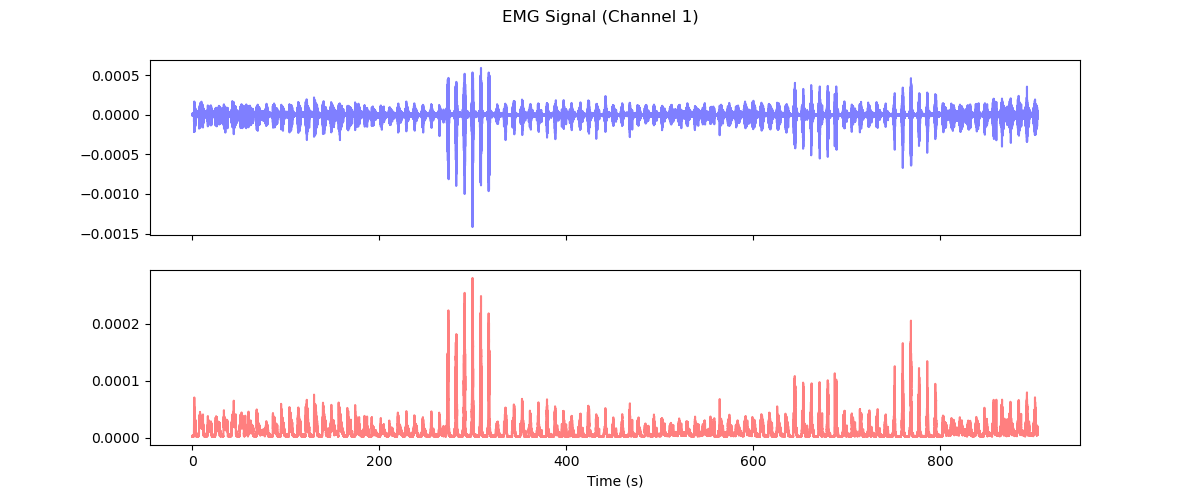

In [24]:
# Plot raw and filtered EMG signals for comparison

fig, axs = plt.subplots(2,1, figsize=(12, 5), sharex=True)
axs[0].plot(time, emg[:, channel_to_plot], color='blue', label='Raw EMG', alpha=0.5)
axs[1].plot(time, filtered_emg, color='red', label='Filtered EMG', alpha=0.5)
plt.suptitle('EMG Signal (Channel {})'.format(channel_to_plot))
plt.xlabel('Time (s)')
# plt.ylabel('Amplitude')
# plt.legend()
# plt.tight_layout()
plt.show()